In [15]:
# -*- coding: euc-kr -*-

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from qutip import *

%matplotlib inline

## Master Equation Solver for Single-Qubit Dynamics

In [16]:
# Coefficients
delta = 2*np.pi

# Dissipation coefficient
g = 0.25

# Hamiltonian
H = delta / 2.0 * sigmax()

# Collapse operators
c_ops = [np.sqrt(g) * sigmaz()]

# Initial quantum state for single qubit
psi_0 = basis(2,0)

# Time linspace
tlist = np.linspace(0,5,100)

In [17]:
# Master equation solve
res = mesolve(H, psi_0, tlist, c_ops, [sigmaz()])

In [18]:
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist*g)

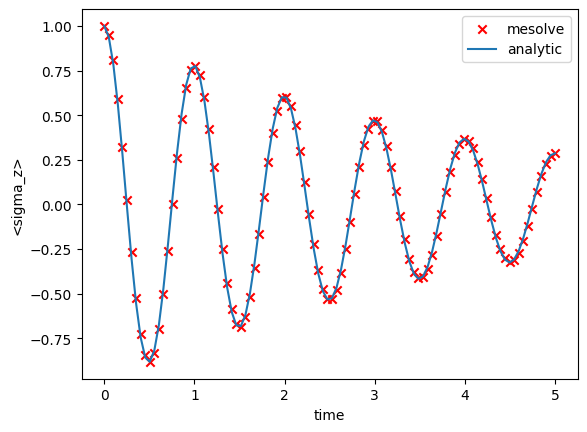

In [19]:
plt.scatter(tlist, res.expect[0], c='r', marker = 'x', label = 'mesolve')
plt.plot(tlist, sz_analytic, label='analytic')
plt.xlabel('time'), plt.ylabel('<sigma_z>')
plt.legend()

In [20]:
res = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])

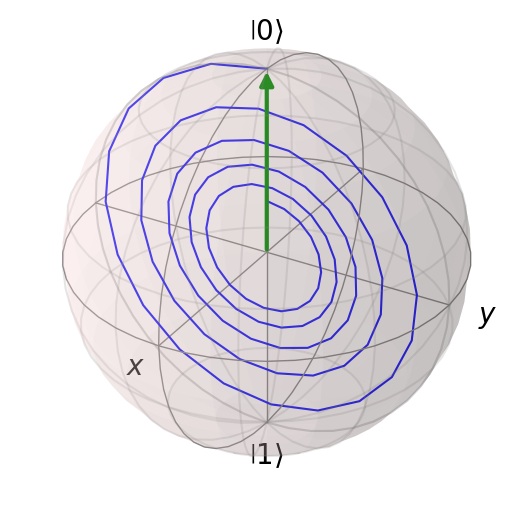

In [21]:
exp_sx, exp_sy, exp_sz = res.expect

sphere = Bloch()
sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')
sphere.add_states(psi_0)
sphere.show()

## Dephasing

In [22]:
# Angle
theta = 0.15 * np.pi

# Hamiltonian
H = delta * (np.cos(theta) * sigmaz() + np.sin(theta) * sigmax())

tlist = np.linspace(0,5,1000)
res = mesolve(H, psi_0, tlist, [], [sigmax(), sigmay(), sigmaz()])

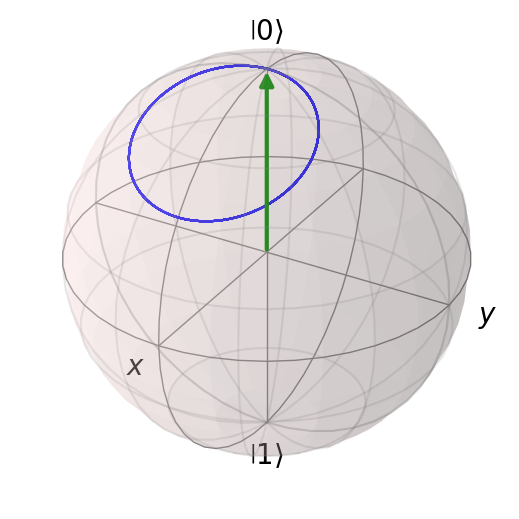

In [23]:
exp_sx, exp_sy, exp_sz = res.expect

sphere = Bloch()
sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')
sphere.add_states(psi_0)
sphere.show()

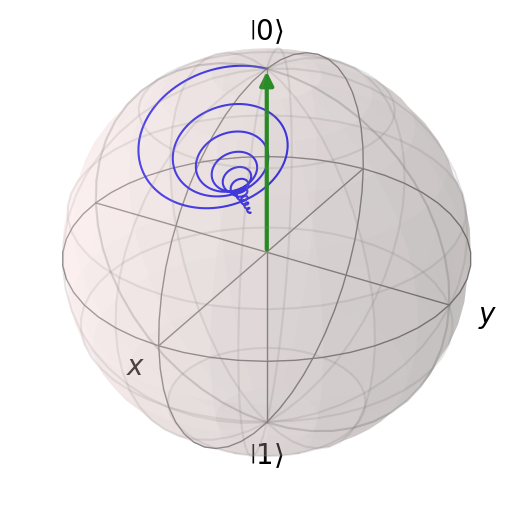

In [24]:
gamma_phase = 0.5
c_ops = [np.sqrt(gamma_phase) * sigmaz()]

# solve master equation
res = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx, exp_sy, exp_sz = res.expect


sphere = Bloch()
sphere.add_points([exp_sx, exp_sy, exp_sz], meth='l')
sphere.add_states(psi_0)
sphere.show()

## Relaxation

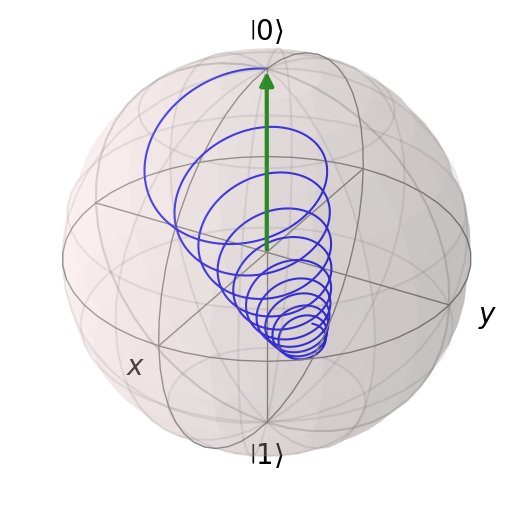

In [25]:
gamma_relax = 0.5
c_ops = [np.sqrt(gamma_relax) * sigmam()]

# solve dynamics
result = mesolve(H, psi_0, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])
exp_sx_relax, exp_sy_relax, exp_sz_relax = result.expect

# Create Bloch sphere plot
sphere = Bloch()
sphere.add_points([exp_sx_relax, exp_sy_relax, exp_sz_relax], meth="l")
sphere.add_states(psi_0)
sphere.show()

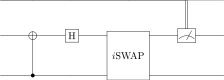

In [36]:
from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import controlled_gate, hadamard_transform
def controlled_hadamard():
    # Controlled Hadamard
    return controlled_gate(
        hadamard_transform(1), 2, control=0, target=1, control_value=1)
qc = QubitCircuit(N=3, num_cbits=3)
qc.user_gates = {"cH": controlled_hadamard}
qc.add_gate("QASMU", targets=[0], arg_value=[1.91063, 0, 0])
qc.add_gate("cH", targets=[0,1])
qc.add_gate("TOFFOLI", targets=[2], controls=[0, 1])
qc.add_gate("X", targets=[0])
qc.add_gate("X", targets=[1])
qc.add_gate("CNOT", targets=[1], controls=0)

qc.svg